# **1. Perkenalan Dataset**


1. **Nama Dataset**:  
   Stunting Toddler (Balita) Detection 

2. **Sumber Dataset**:  
   Dataset diperoleh dari public repositories *Kaggle* yang dapat diakses melalui tautan berikut: https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows

3. **Penjelasan Dataset**:  
   Dataset Stunting Todler Detection berisi 120.999 baris data yang terdiri atas 4 kolom yaitu age (umur), sex (jenis kelamin), height (tinggi badan), dan status nutrisi balita. Data set ini dapat digunakan untuk membantu dalam penyelesaian permasalahan stinting pada anak balita (bayi dibawah lima tahun).

4. **Penjelasan Kolom**:
   Data set Stunting Toddler terdiri atas 4 kolom, berikut rincian dari setiap kolom dalam dataset.
   - Umur (Bulan):  usia balita dalam bulan. Rentang usia ini penting untuk menentukan fase pertumbuhan anak dan membandingkannya dengan standar pertumbuhan yang sehat. Umur 0 sampai 60 bulan
   - Jenis Kelamin: Terdapat dua kategori dalam kolom ini, 'laki-laki' (male) dan 'perempuan' (female). Jenis kelamin merupakan faktor penting dalam analisis pola pertumbuhan dan risiko stunting.
   - Tinggi Badan: Dalam centimeter, tinggi badan adalah indikator utama untuk menilai pertumbuhan fisik balita. Data ini memungkinkan peneliti untuk menentukan apakah pertumbuhan anak sesuai dengan standar usianya.
   - Status Gizi: Kolom ini dikategorikan menjadi 4 status - 'severely stunting', 'stunting', 'normal', dan 'tinggi'. 'Severely stunting' menunjukkan kondisi sangat serius (<-3 SD), 'stunting' menunjukkan kondisi stunting (-3 SD sd <-2 SD), 'normal' mengindikasikan status gizi yang sehat (-2 SD sd +3 SD), dan 'tinggi' (height) menunjukkan pertumbuhan di atas rata-rata (>+3 SD). Kategori ini membantu dalam identifikasi cepat dan intervensi bagi anak-anak yang berisiko atau mengalami masalah pertumbuhan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [136]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [137]:
#Type your code here
df = pd.read_csv("../data_balita_raw.csv")
df.head(10)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
5,0,laki-laki,44.257719,stunted
6,0,laki-laki,59.572523,tinggi
7,0,laki-laki,42.701796,severely stunted
8,0,laki-laki,45.251779,stunted
9,0,laki-laki,57.201961,tinggi


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


Insight:
- Dataset terdiri dari 4 buah kolom dengna 120999 baris data bertipe angka untuk usia, string untuk jenis kelamin, desimal untuk tinggi badan dan string untuk status gizi.
- Tidak ada missing value sehingga tidak perlu penanganan missing value
- Data pada kolom jenis kelamin dan status gizi berupa string sehingga perlu untuk di encoding

In [139]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


Insight:
- Fitur numerik terdiri dari umur dan tinggi badan.
- Tampak bahwa fitur umur memiliki nilai minimum 0 (bayi baru lahir) dan masimal 60 (5 tahun) dan rata-rata berusia 30 bulan. Sehingga, tidak ada invalid value terdeteksi pada fitur Umur
- Tampak bahwa fitur tinggi badan memiliki tinggi minimal 40.01 cm, ini menunjukkan angka yang sangat kecil dan jarang dialami kecuali dalam kasus prematur. Data yang sangar kecil ini dapat mengindikasikan outlier.


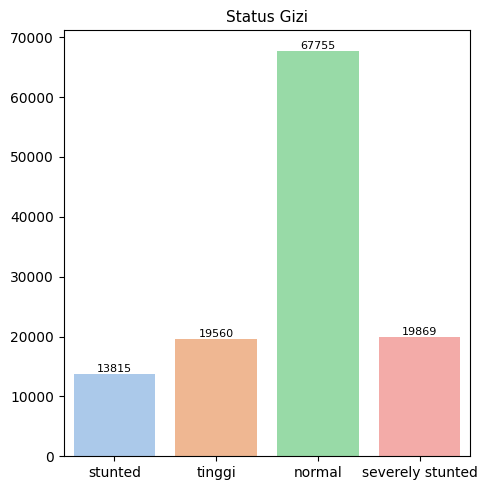

In [140]:
# Tentukan figure 1 plot saja
fig, ax = plt.subplots(figsize=(5, 5))

# Plot countplot untuk kolom 'Jenis Kelamin'
sns.countplot(x='Status Gizi', data=df, hue='Status Gizi', palette='pastel', ax=ax)
ax.set_title('Status Gizi', fontsize=11)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x')

# Tambahkan label jumlah di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Insight: 
- Distribusi data status gizi dalam dataset didominasi oleh data normal dengan jumlah 67755 data, hal ini mengindikasikan imbalance data yang dapat menyebabkan model sangat handal dalam memprediksi kasus normal namun buruk dalam kasus lainnya (stunted, tinggi, severely stunted)
- Dapat mempertimbangkan untuk melakukan penanganan terhadap imbalance data baik dengan resampling data baik dengan melakukan Oversampling maupun Undersampling

C:\Users\hi\AppData\Local\Temp\ipykernel_20648\3570238713.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Jenis Kelamin', palette="pastel", data=df)


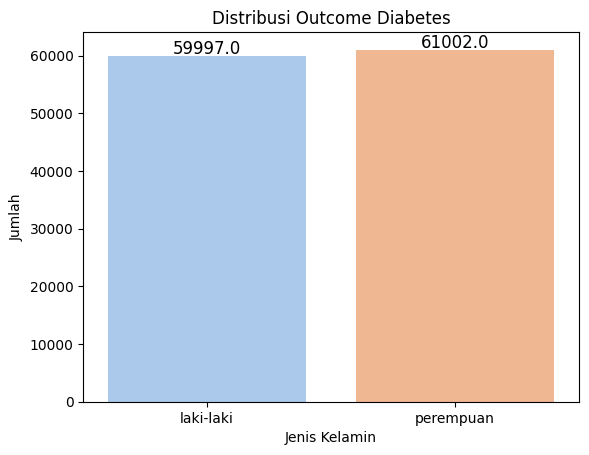

In [141]:
ax = sns.countplot(x='Jenis Kelamin', palette="pastel", data=df)

# jumlah data per unik value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# plot
plt.title('Distribusi Outcome Diabetes')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

Insight:
Distribusi data jenis kelamin untuk perempuan lebih banyak dibantingkan laki-laki

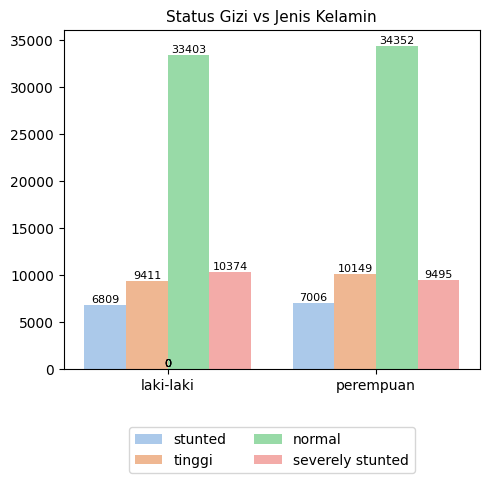

In [142]:
# Tentukan figure 1 plot saja
fig, ax = plt.subplots(figsize=(5, 5))

# Plot countplot untuk kolom 'Jenis Kelamin'
sns.countplot(x='Jenis Kelamin', data=df, hue='Status Gizi', palette='pastel', ax=ax)
ax.set_title('Status Gizi vs Jenis Kelamin', fontsize=11)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x')

# Tambahkan label jumlah di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=8)

# Pindahkan legend ke bawah
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

Insight: 
- Angka severely stunted sering terjadi pada anak berjenis kelamin laki-laki, mencapai 10374
- Angka anak yang normal, tinggi, serta stunned didominasi oleh balita berjenis kelamin perempuan, ini sebanding dengan jumlah perempuan

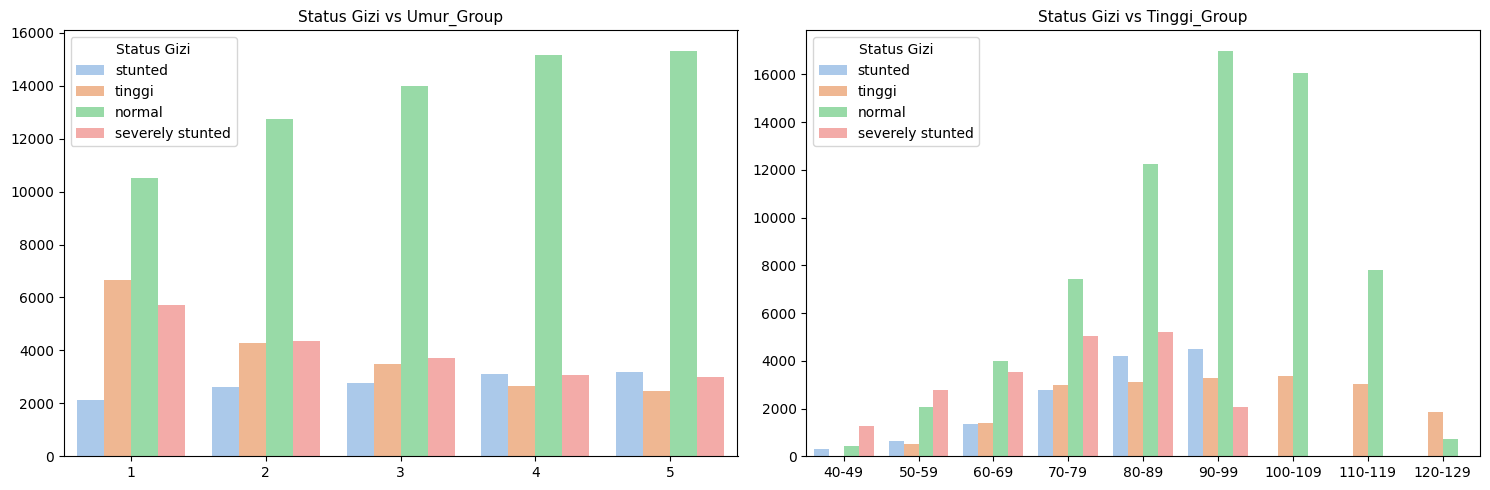

In [143]:
bins_umur = [0, 12, 24, 36, 48, 60]
labels_umur = [1, 2, 3, 4, 5]

df['Umur_Group'] = pd.cut(df['Umur (bulan)'], bins=bins_umur, labels=labels_umur, include_lowest=True)

bins_tb = np.arange(40, 130 + 10, 10)  # 40-129
labels_tb = np.arange(1, len(bins_tb))

df['Tinggi_Group'] = pd.cut(df['Tinggi Badan (cm)'], bins=bins_tb, labels=labels_tb, include_lowest=True)

labels_tb = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df['Tinggi_Group'] = pd.cut(df['Tinggi Badan (cm)'], bins=bins_tb, labels=labels_tb, include_lowest=True)

kategorik_fitur = ['Umur_Group', 'Tinggi_Group']

# Tentukan ukuran grid otomatis
rows, cols = 1, 2  # kamu bisa sesuaikan jumlah kolom
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
axes = axes.flatten()

# Loop untuk plot countplot per fitur
for i, col in enumerate(kategorik_fitur):
    ax = axes[i]
    sns.countplot(x=col, data=df, hue='Status Gizi', palette='pastel', ax=ax)
    ax.set_title(f'Status Gizi vs {col}', fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=0)  

for j in range(len(kategorik_fitur), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Insight:
- Balita dengna usia - dan 5 tahun banyak yang menderita stanting
- Balita dengan usia 1-3 tahun banyak yang menderita severely stunted atau kondisi stunting yang sangat serius
- Balita dengan tinggi > 100 cm diindikasikan sebagai normal dan tinggi
- Balita dibawah 100 cm masih banyak yang terindikasi stuntin, namun tidak dapat disimpulkan kerena data tinggi memerlukan korelasi dengan usia

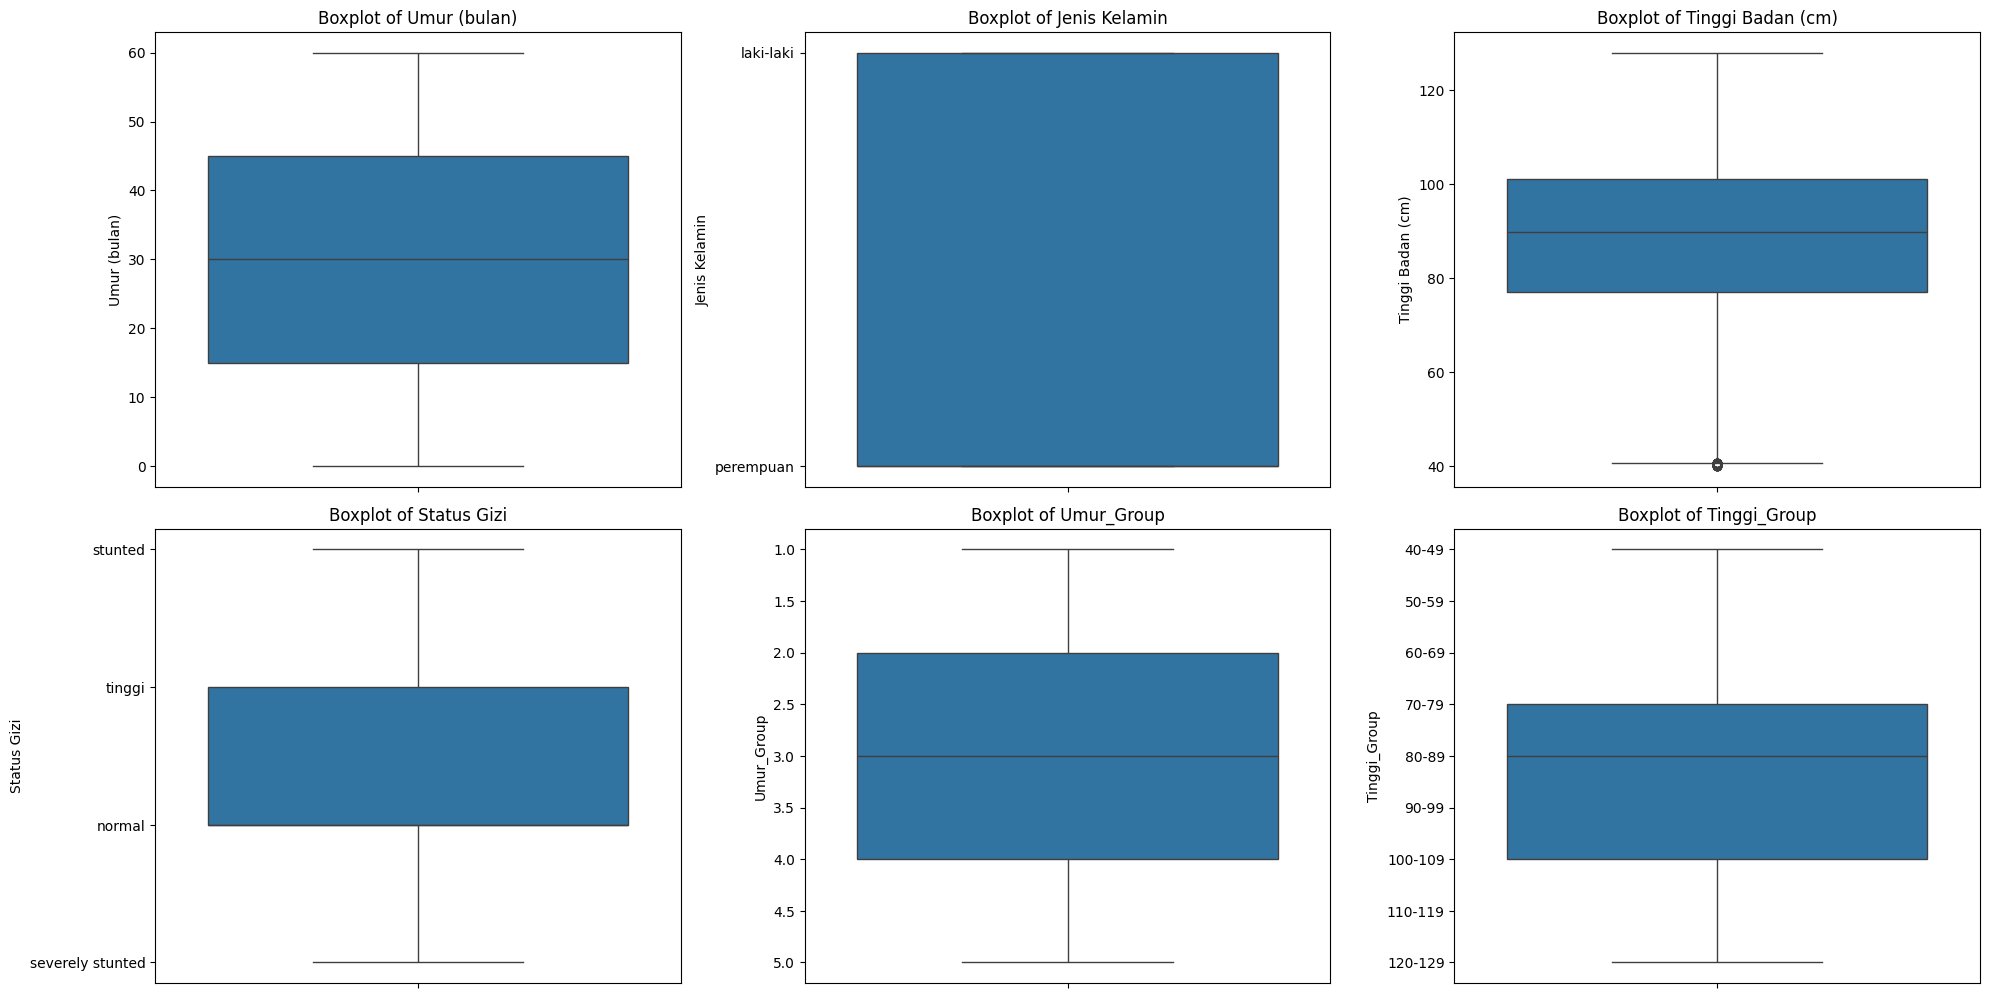

In [144]:
# boxplot
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Insight:
- Berdasarkan box plot diatas, fitur umur, jenis kelamin dan status gizi tidak memiliki data outlier, sehingga tidak diperlukan pananganan outlier
- Fitur Tinggi badan memiliki data outlier sehingga perlu dilakukan penanganan

In [145]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  81574


Insight:
- Masih terdapat banyak sekali jumlah duplikasi data
- Hal ini dapat ditangani dengan drop data yang duplikat

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Berikut adalah tahapan-tahapan yang dilakukan:
1. Menghapus Data Duplikat
2. Penanganan Outlier
3. Encoding Data Kategorikal

### **1. Penanganan Outlier**

In [146]:
# hitung Q1, Q3, dan IQR untuk kolom Pregnancies
Q1 = df['Tinggi Badan (cm)'].quantile(0.25)
Q3 = df['Tinggi Badan (cm)'].quantile(0.75)
IQR = Q3 - Q1

# batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter data untuk hanya menampilkan outlier
outliers = df[(df['Tinggi Badan (cm)'] < lower_bound) |
                       (df['Tinggi Badan (cm)'] > upper_bound)]

# tabel outlier
print(outliers[['Tinggi Badan (cm)', 'Umur (bulan)', 'Jenis Kelamin', 'Status Gizi']])

      Tinggi Badan (cm)  Umur (bulan) Jenis Kelamin       Status Gizi
1009          40.235944             0     perempuan  severely stunted
1056          40.058140             0     perempuan  severely stunted
1104          40.602533             0     perempuan  severely stunted
1165          40.285473             0     perempuan  severely stunted
1179          40.252380             0     perempuan  severely stunted
1195          40.539600             0     perempuan  severely stunted
1252          40.021110             0     perempuan  severely stunted
1258          40.268891             0     perempuan  severely stunted
1302          40.340323             0     perempuan  severely stunted
1303          40.171322             0     perempuan  severely stunted
1304          40.152816             0     perempuan  severely stunted
1350          40.154283             0     perempuan  severely stunted
1385          40.029406             0     perempuan  severely stunted
1411          40.607

In [147]:
print(f"Jumlah data sebelum menghapus outlier: {len(df)}")

# drop outlier
df_no_outlier = df[(df['Tinggi Badan (cm)'] >= lower_bound) &
(df['Tinggi Badan (cm)'] <= upper_bound)]

# yampilkan data setelah outlier dihapus
print(f"\nJumlah data setelah menghapus outlier: {len(df_no_outlier)}")

Jumlah data sebelum menghapus outlier: 120999

Jumlah data setelah menghapus outlier: 120961


### **2. Menghapus Data Duplikat**

In [148]:
print("Jumlah duplikasi: ", df_no_outlier.duplicated().sum())

Jumlah duplikasi:  81574


In [149]:
df_no_duplication = df.drop_duplicates()

In [150]:
print("Jumlah duplikasi: ", df_no_duplication.duplicated().sum())

Jumlah duplikasi:  0


### **3. Encoding Data Kategorikal**

In [151]:
df.sample(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Umur_Group,Tinggi_Group
91344,46,laki-laki,100.400000,normal,4,100-109
5707,2,perempuan,48.678143,severely stunted,1,40-49
38908,19,perempuan,67.700000,severely stunted,2,60-69
20397,10,perempuan,61.500000,severely stunted,1,60-69
23600,12,laki-laki,79.500000,normal,1,70-79


In [152]:
df_encode = df_no_duplication[['Umur (bulan)','Jenis Kelamin','Tinggi Badan (cm)','Status Gizi']]

In [153]:
# jenis kelamin
df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

# status gizi
df_encode['Status Gizi'] = df_encode['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

df_encode.sample(20)

C:\Users\hi\AppData\Local\Temp\ipykernel_20648\1819301823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
C:\Users\hi\AppData\Local\Temp\ipykernel_20648\1819301823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode['Status Gizi'] = df_encode['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
93611,47,0,88.000000,0
90504,45,1,112.100000,2
88371,44,1,108.500000,2
16098,8,0,82.800000,3
113054,57,0,92.400000,0
86020,43,1,102.000000,2
102045,51,1,103.500000,2
56146,28,1,86.900000,2
5689,2,1,63.921839,3
58342,29,1,89.300000,2


In [155]:
from sklearn.model_selection import train_test_split

# memisahkan fitur dan target
X = df_encode.iloc[:, 1:6]
X = df_encode.drop('Status Gizi', axis=1)
y = df_encode['Status Gizi']

# membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,0,0,44.591973
1,0,0,56.705203
2,0,0,46.863358
3,0,0,47.508026
4,0,0,42.743494
...,...,...,...
120959,60,1,100.700000
120967,60,1,113.700000
120968,60,1,107.500000
120972,60,1,127.600000


In [168]:
df_encode.to_csv("data_balita_preprocessing.csv", index=False)